تعداد یال‌ها، رئوس و جهت‌دار بودن یا نبودن گراف

In [2]:
import networkx as nx

# Load the graph from the GML file
G = nx.read_gml('graph.gml')

# Print the number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Check if the graph is directed
print("Is the graph directed?", G.is_directed())

Number of nodes: 1000
Number of edges: 39617
Is the graph directed? False


میانگین درجه و چگالی، تعداد مولفه‌ها

In [3]:
# Calculate the average degree
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("Average degree:", average_degree)

# Calculate the density of the graph
density = nx.density(G)
print("Density:", density)

# Calculate the number of connected components
if G.is_directed():
    components = nx.number_strongly_connected_components(G)
else:
    components = nx.number_connected_components(G)
print("Number of components:", components)

Average degree: 79.234
Density: 0.07931331331331332
Number of components: 1


اندازه بزرگترین مولفه همبند

In [4]:
if G.is_directed():
    largest_component = max(nx.strongly_connected_components(G), key=len)
else:
    largest_component = max(nx.connected_components(G), key=len)

largest_component_size = len(largest_component)
print("Size of the largest connected component:", largest_component_size)

Size of the largest connected component: 1000


هیستوگرام و چگالی

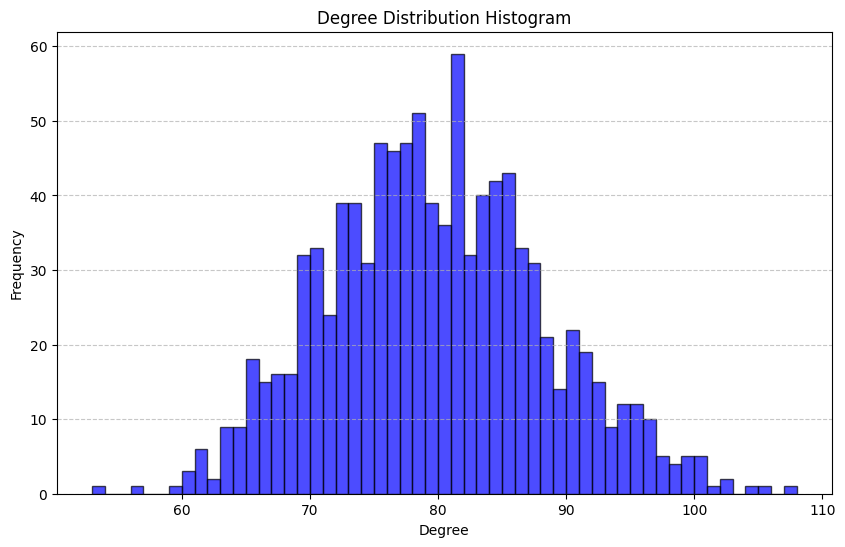

In [6]:
import matplotlib.pyplot as plt

# Get the degree of each node
degrees = [degree for _, degree in G.degree()]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='blue', alpha=0.7, edgecolor='black')
plt.title("Degree Distribution Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


همانطور که مشاهده می‌کنیم توزیع درجات توزیعی تقریبا نرمال و با میانگین حدود ۸۰ برای یک گراف با ۱۰۰۰ رأس است بنابراین نمی‌توانیم انتظار چگالی بالایی برای آن داشته باشیم.

مرکزیت درجه، بینابینی، نزدیکی، و بردار ویژه

In [7]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality (sample):", dict(list(degree_centrality.items())[:5]))

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality (sample):", dict(list(betweenness_centrality.items())[:5]))

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality (sample):", dict(list(closeness_centrality.items())[:5]))

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector Centrality (sample):", dict(list(eigenvector_centrality.items())[:5]))

Degree Centrality (sample): {'0': 0.08608608608608609, '1': 0.06606606606606606, '2': 0.06606606606606606, '3': 0.07307307307307308, '4': 0.0970970970970971}
Betweenness Centrality (sample): {'0': 0.0010994470862450284, '1': 0.00064510257785207, '2': 0.0006439860977658368, '3': 0.0007684722049133012, '4': 0.0014137445124654817}
Closeness Centrality (sample): {'0': 0.5222164140094093, '1': 0.5160123966942148, '2': 0.5157459989674755, '3': 0.5181535269709544, '4': 0.5255128879537085}
Eigenvector Centrality (sample): {'0': 0.034104467669572466, '1': 0.026170646084565766, '2': 0.026012881380239824, '3': 0.028886103750896494, '4': 0.03810596910783385}


میانگین کوتاه‌ترین مسیر و قطر

In [8]:
# Calculate the average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_shortest_path_length)

# Calculate the diameter of the graph
diameter = nx.diameter(G)
print("Diameter:", diameter)

Average shortest path length: 1.9224684684684685
Diameter: 3


نقاط قطع

In [9]:
# Find articulation points
articulation_points = list(nx.articulation_points(G))
print("Articulation Points:", articulation_points)

Articulation Points: []


بزرگترین و کوچکترین PC

In [11]:
# Dictionary to store the number of components after removing each articulation point
components_after_removal = {}

for point in articulation_points:
    # Create a copy of the graph
    G_copy = G.copy()
    # Remove the articulation point
    G_copy.remove_node(point)
    # Calculate the number of components
    if G.is_directed():
        num_components = nx.number_strongly_connected_components(G_copy)
    else:
        num_components = nx.number_connected_components(G_copy)
    components_after_removal[point] = num_components


if components_after_removal.keys():
    # Find the articulation point that causes the minimum and maximum number of components
    min_components_point = min(components_after_removal, key=components_after_removal.get)
    max_components_point = max(components_after_removal, key=components_after_removal.get)

    print("Articulation point causing the minimum number of components:", min_components_point)
    print("Articulation point causing the maximum number of components:", max_components_point)
else:
    print("No articulation points.")

No articulation points.
